# I- Presentation
Customer segmentation enables a company to customize its relationships with the customers, as we do in our daily lives.
When you perform customer segmentation, you find similar characteristics in each customer’s behaviour and needs. Then, those are generalized into groups to satisfy demands with various strategies. Moreover, those strategies can be an input of the :
- Targeted marketing activities to specific groups
- Launch of features aligning with the customer demand

Today, I will apply an unsupervised machine learning algorithm with Python.
I will apply K-Means clustering to the dataset with the following steps.
- Preprocessing
- Segmentation with K-means, DBSCAN and hierarchical Clustering
- Hyperparameter Tuning
- Visualization and Interpretation of the Results

# II- EDA

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

# Dislay options
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 2000)

#statistics
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
# ML models
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
#
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn import metrics
from pandas.plotting import parallel_coordinates
import plotly.graph_objects as go
from sklearn.manifold import TSNE
import umap.umap_ as umap
from kneed import KneeLocator
from time import time


In [2]:
df = pd.read_csv('customer segmentation olist.csv')
df

,total_orders,total_item,total_products_payment,total_freight_payment,freight_ratio,mean_review_score,order_mean_sequential_number,order_mean_installement_number,order_mean_delivery_delay(day),recency(day),mean_delay_between_orders,"ratio_price_Books, cds & media","ratio_price_Fashion, clothing and accessories",ratio_price_Flowers_gifts,"ratio_price_Groceries, food & drink",ratio_price_Health & Beauty,ratio_price_Home & furniture,ratio_price_Sport & leisure,ratio_price_Technology,ratio_price_Toys and baby,ratio_price_other,ratio_price_April,ratio_price_August,ratio_price_December,ratio_price_February,ratio_price_January,ratio_price_July,ratio_price_June,ratio_price_March,ratio_price_May,ratio_price_November,ratio_price_October,ratio_price_September,ratio_price_AC,ratio_price_AL,ratio_price_AM,ratio_price_AP,ratio_price_BA,ratio_price_CE,ratio_price_DF,ratio_price_ES,ratio_price_GO,ratio_price_MA,ratio_price_MG,ratio_price_MS,ratio_price_MT,ratio_price_PA,ratio_price_PB,ratio_price_PE,ratio_price_PI,ratio_price_PR,ratio_price_RJ,ratio_price_RN,ratio_price_RO,ratio_price_RR,ratio_price_RS,ratio_price_SC,ratio_price_SE,ratio_price_SP,ratio_price_TO
0,1,1,129.90,12.00,0.08,5.0,1.0,8.0,6.0,111,695.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,18.90,8.29,0.30,4.0,1.0,1.0,3.0,114,695.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,69.00,17.22,0.20,3.0,1.0,8.0,26.0,537,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,25.99,17.63,0.40,4.0,1.0,4.0,20.0,321,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,180.00,16.89,0.09,5.0,1.0,6.0,13.0,288,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91468,1,2,1570.00,497.42,0.24,5.0,1.0,10.0,28.0,447,695.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91469,1,1,64.89,19.69,0.23,4.0,1.0,1.0,30.0,262,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91470,1,1,89.90,22.56,0.20,5.0,1.0,1.0,15.0,568,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91471,1,1,115.00,18.69,0.14,5.0,1.0,5.0,12.0,119,695.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.rename(columns={'total_orders':'Frequency', 'total_products_payment':'Monetary', 'recency(day)':'Recency'}, inplace=True)

In [4]:
X = df[['Recency','Frequency', 'Monetary','order_mean_delivery_delay(day)','mean_review_score' ]]

In [5]:
X.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
Recency,91473.000000,236.694981,152.590800,0.000000,113.000000,218.000000,345.000000,695.000000
Frequency,91473.000000,1.032873,0.206224,1.000000,1.000000,1.000000,1.000000,14.000000
Monetary,91473.000000,141.393816,214.253408,0.850000,47.650000,89.180000,154.200000,13440.000000
order_mean_delivery_delay(day),91473.000000,12.479958,9.458341,1.000000,7.000000,10.000000,16.000000,208.000000
mean_review_score,91473.000000,4.154737,1.279205,1.000000,4.000000,5.000000,5.000000,5.000000


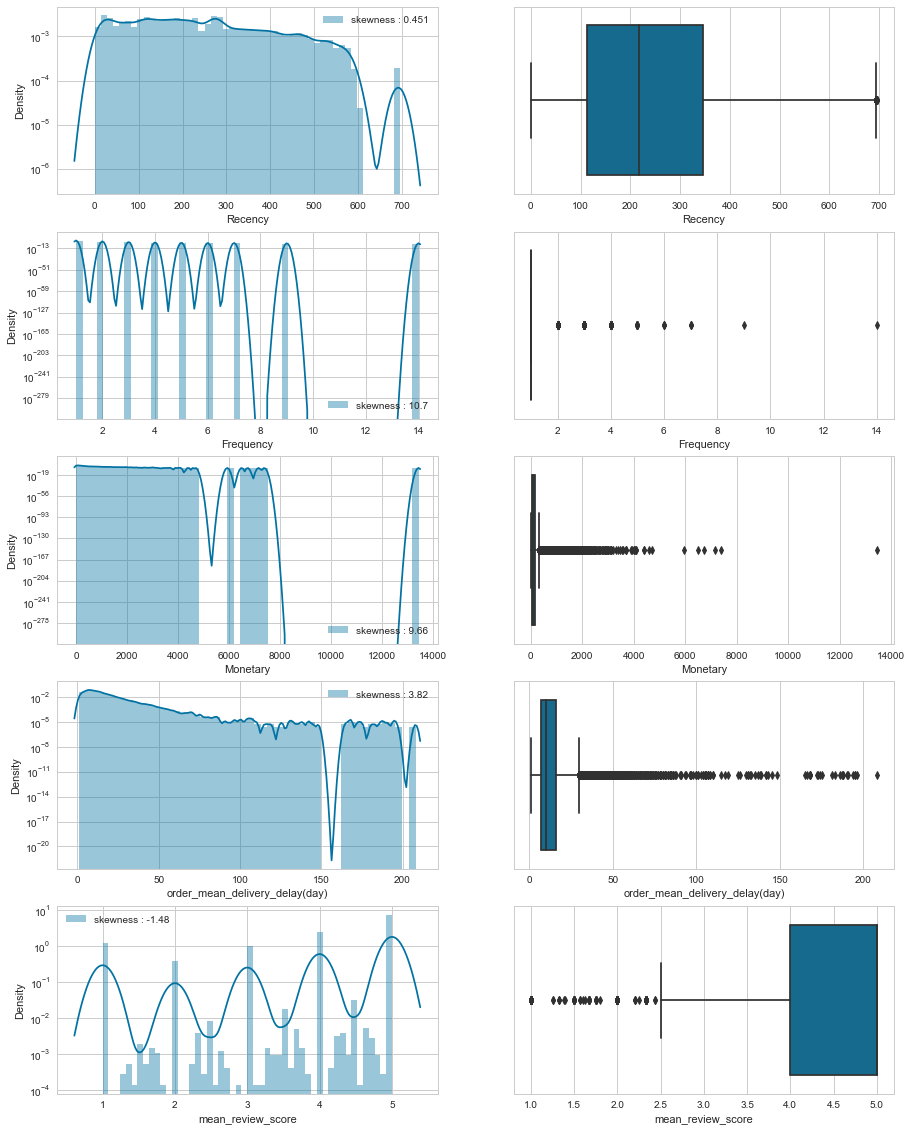

In [6]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure(1, figsize=(15,20))
for i,label in enumerate(X.columns) :
    plt.subplot(5,2,2*i+1)
    sns.distplot(X[label] , label ="skewness : {:.3}".format(X[label].skew()))
    plt.yscale ("log")
    plt.legend()
    
    plt.subplot(5,2,2*i+2)
    sns.boxplot(X[label], orient="v")
plt.show()

In [7]:
palette = ['lightgreen','darkviolet','red','blue','gray']
colormap=np.array(palette)

def plot_2D(data, col1, col2): 
   
    plt.style.use('seaborn-whitegrid') 
    fig , ax = plt.subplots (figsize = (5,5))    
    ax.scatter (x=data[col1] , y=data[col2], c='blue')
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    
def plot_3D (data, col1, col2, col3) :  
    
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=((10,10)))
    ax = fig.add_subplot(111, projection = '3d')

    x = data[col1]    
    y = data[col2]
    z = data[col3]
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_zlabel(col3)
    
    ax.scatter(x, y, z, c='blue')
    ax.view_init(elev=10, azim=10) 


In [8]:
X.columns

Index(['Recency', 'Frequency', 'Monetary', 'order_mean_delivery_delay(day)',
       'mean_review_score'],
      dtype='object')

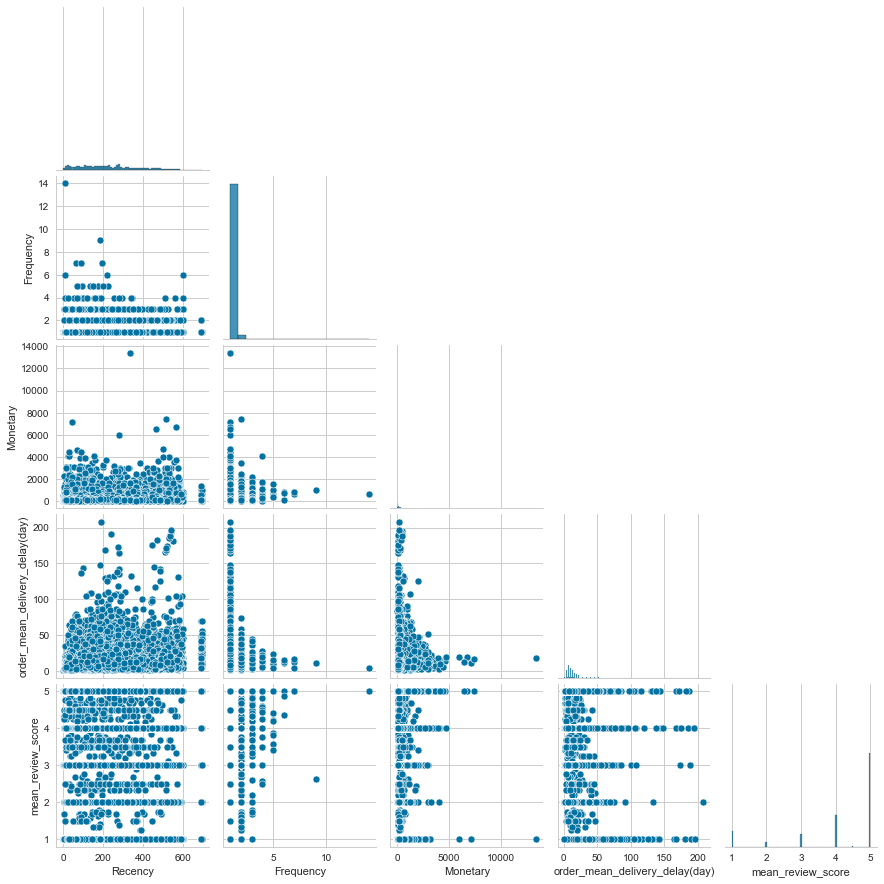

In [9]:
sns.pairplot(X, corner=True, height=2.5)

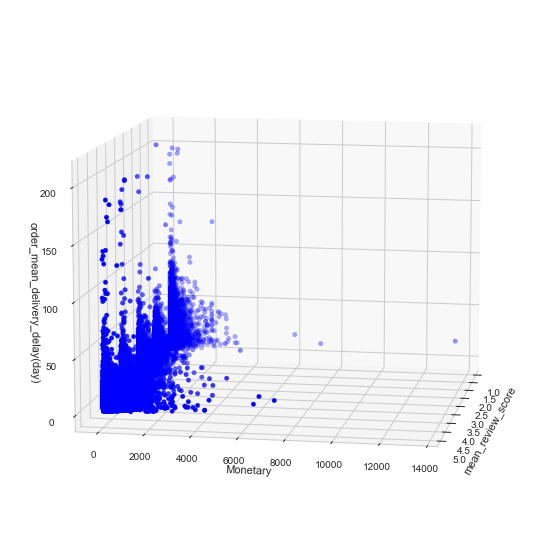

In [10]:
plot_3D(X, 'mean_review_score', 'Monetary', 'order_mean_delivery_delay(day)' )

# III- Preprocessing

In [11]:
features_to_scale = ['Frequency', 'Monetary', 'Recency', 'mean_review_score','order_mean_delivery_delay(day)']
preprocessor = make_column_transformer((StandardScaler(),features_to_scale),
                                 remainder='passthrough')

# VI- Clustering Models

In [12]:
def plot_3D_clusters (data, col1,col2,col3): 
    sns.set(style = "darkgrid")

    fig = plt.figure(figsize=((8,8)))
    ax = fig.add_subplot(111, projection = '3d')

    x = data[col1]    
    y = data[col2]
    z = data[col3]
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_zlabel(col3)
    plt.ylim([1,4])

    
    ax.scatter(x, y, z, c=colormap[data['cluster']])
    ax.view_init(elev=10, azim=10)
    


In [13]:
def elbow_score(data):
    """
    """

    kmeans=KMeans(random_state=1)
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    distortion_visualizer = KElbowVisualizer(kmeans,k=(2,9))
    distortion_visualizer.fit(data)
    distortion_visualizer.show()
  
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,2)
    calinski_visualizer = KElbowVisualizer(kmeans,k=(2,9), metric='calinski_harabasz')
    calinski_visualizer.fit(data)
    calinski_visualizer.show()

    
####################################

def silhouette_score(data):
    kmeans=KMeans(random_state=1)
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,3)
    silhouette_visualizer = KElbowVisualizer(kmeans,K=(2,9), metric='silhouette')
    silhouette_visualizer.fit(data)
    silhouette_visualizer.show()

###############################

def silhouette_visualizer(data, best_k):
    """
    """
    plt.figure(figsize=(5,6))
    silhouette_visualizer = SilhouetteVisualizer(KMeans(best_k), colors=palette)
    silhouette_visualizer.fit(data)
    silhouette_visualizer.show()
    
################################

def intercluster_distance(data, best_k):
    """Intercluster distance Map with best k
    """
    
    distance_visualizer = InterclusterDistance(KMeans(best_k))
    distance_visualizer.fit(data)
    distance_visualizer.show()    

## 1- Clustering with KMeans

### 1-1- Hyperparameter tuning

In [14]:
X_kmeans = X
X_kmeans_scale=preprocessor.fit_transform(X_kmeans)
X_kmeans_scale = pd.DataFrame(data=X_kmeans_scale, columns=X_kmeans.columns)

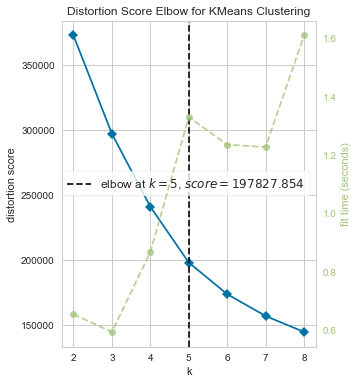

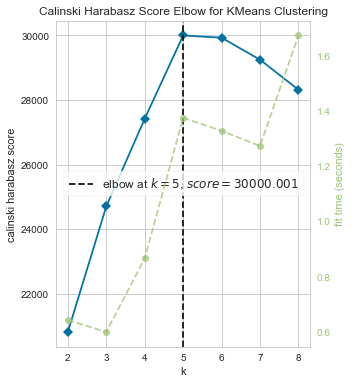

Wall time: 16 s


In [15]:
%%time
elbow_score(X_kmeans_scale)

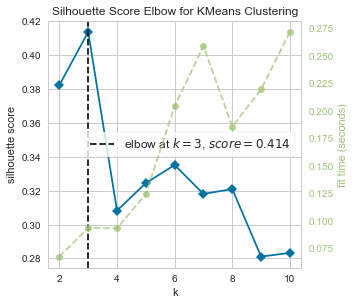

In [16]:
silhouette_score(X_kmeans_scale.sample(frac=.1))

In [17]:
kmin=2
kmax=6
X_kmeans_clusters = X_kmeans.copy()
for k in range (kmin, kmax+1):
    kmeans=KMeans(random_state=1, n_clusters=k)
    kmeans.fit(X_kmeans_scale)
    X_kmeans_clusters[str(k)+' '+'clusters'] = kmeans.labels_

In [18]:
X_kmeans_clusters

,Recency,Frequency,Monetary,order_mean_delivery_delay(day),mean_review_score,2 clusters,3 clusters,4 clusters,5 clusters,6 clusters
0,111,1,129.90,6.0,5.0,0,0,2,0,3
1,114,1,18.90,3.0,4.0,0,0,2,0,3
2,537,1,69.00,26.0,3.0,1,1,0,1,1
3,321,1,25.99,20.0,4.0,0,0,0,1,1
4,288,1,180.00,13.0,5.0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
91468,447,1,1570.00,28.0,5.0,0,0,0,4,4
91469,262,1,64.89,30.0,4.0,1,1,3,2,0
91470,568,1,89.90,15.0,5.0,0,0,0,1,1
91471,119,1,115.00,12.0,5.0,0,0,2,0,3


In [19]:
clusers_columns = ['2 clusters', '3 clusters','4 clusters', '5 clusters', '6 clusters']
for col in clusers_columns : 
    print('the number of customers per cluster in',col,'is:\n',X_kmeans_clusters[col].value_counts())
    print(50*'_')

the number of customers per cluster in 2 clusters is:
 0    75357
1    16116
Name: 2 clusters, dtype: int64
__________________________________________________
the number of customers per cluster in 3 clusters is:
 0    73199
1    15564
2     2710
Name: 3 clusters, dtype: int64
__________________________________________________
the number of customers per cluster in 4 clusters is:
 2    42092
0    32627
3    14044
1     2710
Name: 4 clusters, dtype: int64
__________________________________________________
the number of customers per cluster in 5 clusters is:
 0    41171
1    31952
2    13729
3     2682
4     1939
Name: 5 clusters, dtype: int64
__________________________________________________
the number of customers per cluster in 6 clusters is:
 3    39487
1    30697
5    11782
0     4936
2     2680
4     1891
Name: 6 clusters, dtype: int64
__________________________________________________


In [20]:
best_k=3

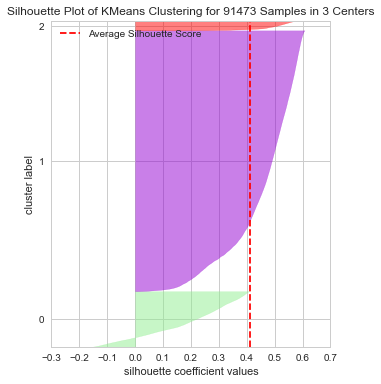

In [21]:
silhouette_visualizer(X_kmeans_scale, best_k )

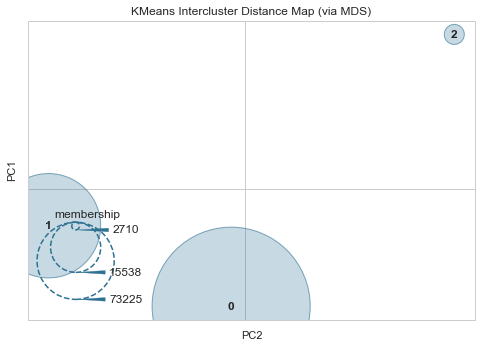

In [22]:
intercluster_distance(X_kmeans_scale, best_k)

### 1-2- Clustering

Thanks to the elbow method based on the distortion score (average sum of the squares of the distances to the centers), a segmentation in K = 5 clusters would be the best option.

In [23]:
model = KMeans(n_clusters=best_k)
clusters = model.fit_predict(X_kmeans_scale)
print("clusters creayed are : "+ str(list(set(clusters))))

clusters creayed are : [0, 1, 2]


In [24]:
X_kmeans_clusters = X_kmeans_clusters.drop(columns=['2 clusters', '4 clusters', '5 clusters', '6 clusters'], axis=1)
X_kmeans_clusters.rename(columns={'3 clusters':'cluster'}, inplace=True)
X_kmeans_clusters

,Recency,Frequency,Monetary,order_mean_delivery_delay(day),mean_review_score,cluster
0,111,1,129.90,6.0,5.0,0
1,114,1,18.90,3.0,4.0,0
2,537,1,69.00,26.0,3.0,1
3,321,1,25.99,20.0,4.0,0
4,288,1,180.00,13.0,5.0,0
...,...,...,...,...,...,...
91468,447,1,1570.00,28.0,5.0,0
91469,262,1,64.89,30.0,4.0,1
91470,568,1,89.90,15.0,5.0,0
91471,119,1,115.00,12.0,5.0,0


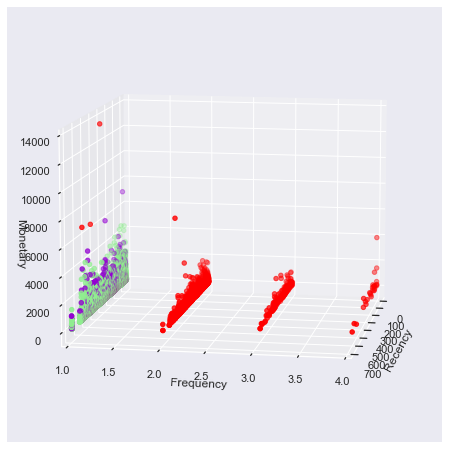

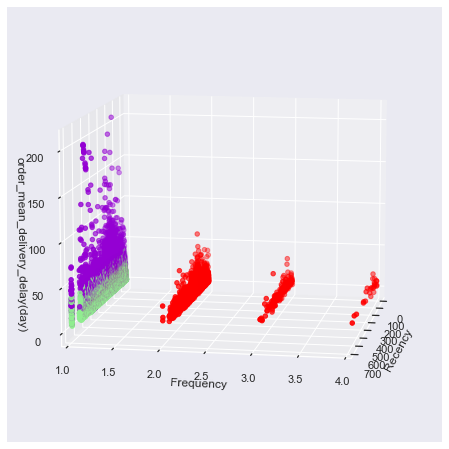

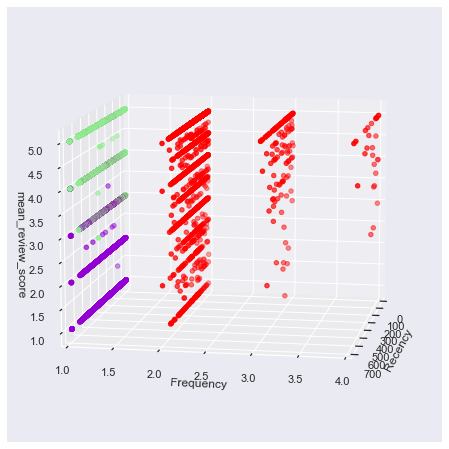

In [25]:
col_for_3D = ['Monetary','order_mean_delivery_delay(day)','mean_review_score']
for col in col_for_3D : 
    plot_3D_clusters(X_kmeans_clusters, 'Recency','Frequency',col )


### 1-3- Clusters analyzing

In [26]:
def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)    
#################################################

def customers_per_cluster(data):
    """"""
    plt.rcParams["figure.figsize"]=(5,5)
    plt.rcParams["figure.autolayout"] = True
    
    ax = sns.countplot(data=data, x='cluster', palette=palette)
   
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

    plt.show()

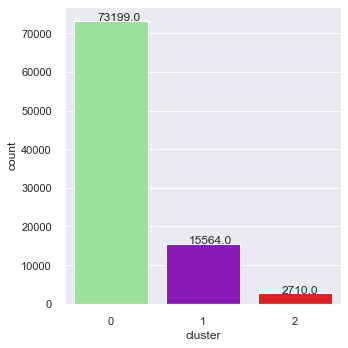

In [27]:
customers_per_cluster(X_kmeans_clusters)

In [28]:
centroids = X_kmeans_clusters.groupby('cluster').mean()
centroids

,Recency,Frequency,Monetary,order_mean_delivery_delay(day),mean_review_score
cluster,,,,,
0,235.633861,1.000000,131.834376,10.535540,4.658479
1,244.690696,1.000000,164.030821,21.674441,1.777178
2,219.435793,2.109594,269.592756,12.194528,4.203033


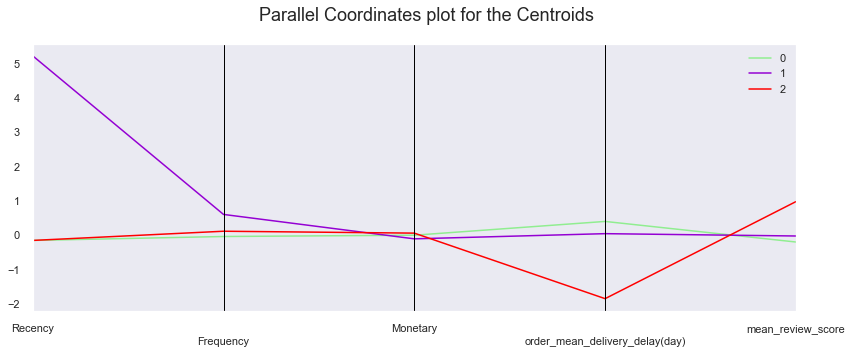

In [29]:
kmeans_centroids = model.cluster_centers_
kmeans_centroids = pd.DataFrame(data=kmeans_centroids, columns=X_kmeans.columns)
kmeans_centroids=kmeans_centroids.reset_index()
kmeans_centroids.rename(columns={'index':'cluster'}, inplace=True)
kmeans_centroids
display_parallel_coordinates_centroids(kmeans_centroids, best_k)

In [30]:
def boxplot(data, col) : 
    fig=plt.figure(figsize=(7,6))
    sns.boxplot(data=data, x='cluster', y=col, palette=palette)    

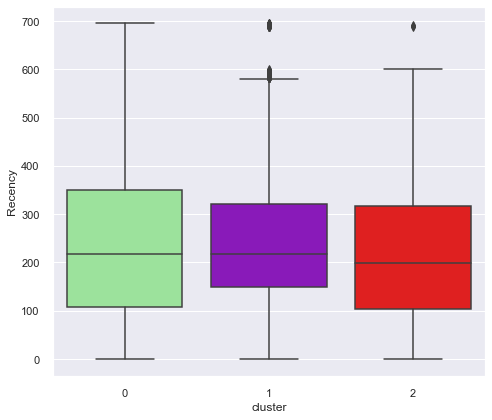

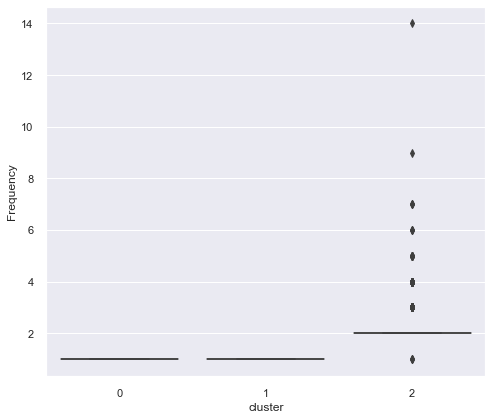

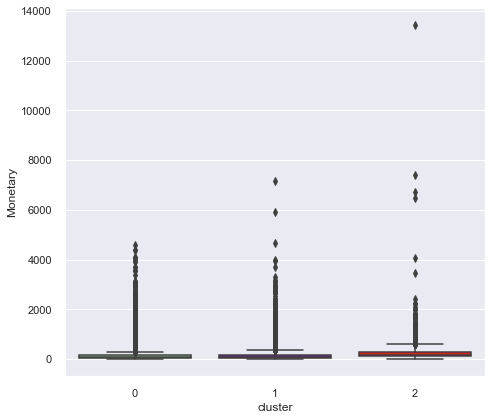

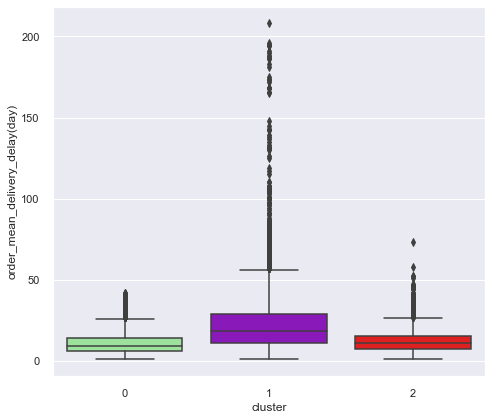

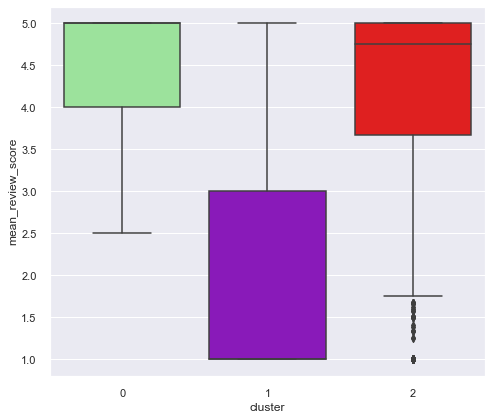

In [31]:
for col in X.columns : 
    boxplot(X_kmeans_clusters, col)

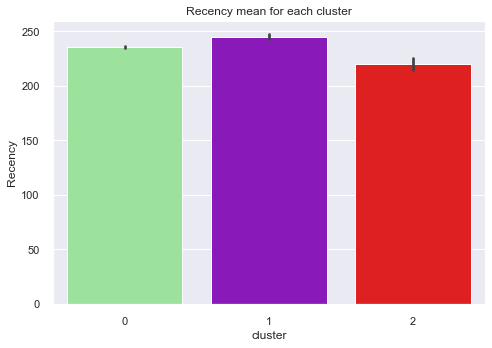

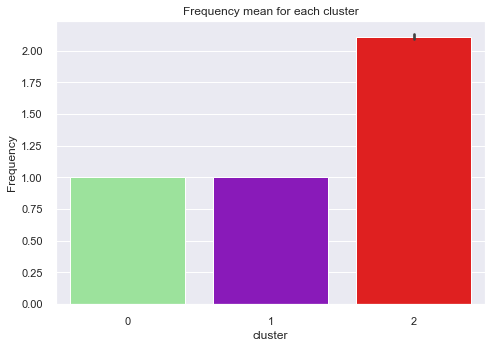

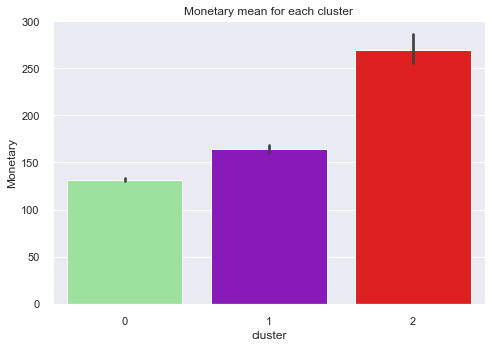

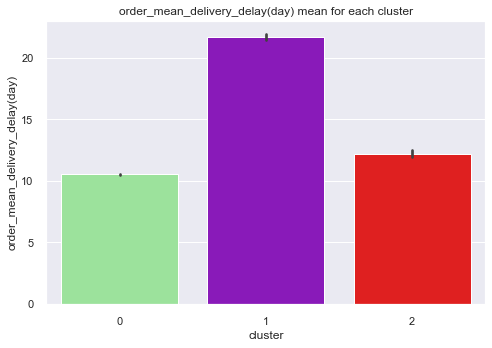

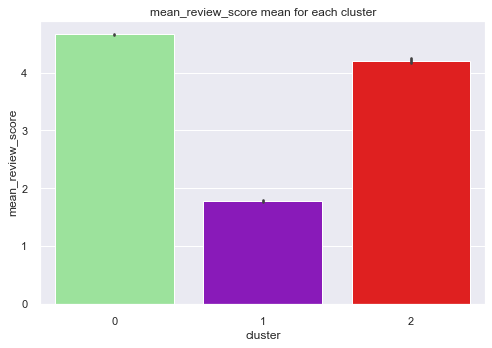

In [32]:
for column in X.columns:
    plt.figure(figsize=(7,5))
    titre = str(column) + ' mean' + ' for each cluster' 
    plt.title(titre)
    sns.barplot(x = 'cluster',
                y = column,
                data = X_kmeans_clusters, 
                palette=palette)
    plt.show()


### 1-4- k-means with Dimensionality Reduction Techniques

In [33]:
def plot_2D_reduction (data, col, PC1, PC2, reduction):
    """
    """
    sns.set(style = "darkgrid")
    fig , ax = plt.subplots (figsize = (6,6))
    
    ax.scatter (x=data[PC1] , y=data[PC2], c=colormap[data[col]])
    plt.xlabel(PC1, size=15)
    plt.ylabel(PC2, size=15)
    plt.title(str(reduction) + "_projection", size=25)

#### a- PCA

In [34]:
def display_scree_plot(pca,n_components):
    
    scree = pca.explained_variance_ratio_*100
    plt.figure (figsize=(7,7))
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("principal component", size = 30)
    plt.ylabel("pourcentage of variance" , size = 30)
    plt.title("scree of eigenvalues" , size = 30)
    p = (100 / n_components) 
    plt.axhline(y = (100 / n_components), linewidth = 1, color = "dimgray", linestyle = "--")
    plt.text(5, 18, "p"+"%")
    plt.show(block=False)   

In [35]:
# Calculate PCA
pca = PCA (n_components = 4, svd_solver="full" ) # decomposition into singular values
X_pca = pca.fit_transform(X_kmeans_scale)
centroids_pca = pca.transform(kmeans_centroids.drop(columns='cluster', axis=1))
centroids_pca

array([[-0.41548437, -0.11146066,  0.09697551,  0.12446937],
       [ 0.07060848,  4.14586063,  0.54341569, -3.18509153],
       [ 1.93859265, -0.19754982, -0.54983194, -0.03059492]])

In [36]:
pca_columns = ['DIM' + str(c) for c in range(1, X_pca.shape[1]+1, 1)] 
X_pca  = pd.DataFrame (data = X_pca, columns= pca_columns)
clusters = model.fit_predict(X_pca)
X_pca['cluster']=clusters
X_pca

,DIM1,DIM2,DIM3,DIM4,cluster
0,-1.101070,0.094560,-0.569706,0.228575,0
1,-0.885546,-0.272903,-0.865421,-0.186838,0
2,1.955147,-0.876754,1.446033,-0.432490,1
3,0.660637,-0.639843,0.354144,-0.369036,1
4,-0.300417,-0.035865,0.527554,0.266343,0
...,...,...,...,...,...
91468,2.108795,3.970264,2.475946,4.696209,1
91469,1.346554,-0.499905,-0.006902,-0.275878,1
91470,0.165148,-0.712079,2.165488,-0.176807,1
91471,-0.659123,0.000236,-0.549381,0.137412,0


In [37]:
explained_variance = pd.Series(dict(zip(X_pca.columns, 100.0*pca.explained_variance_ratio_)))
display(explained_variance)

DIM1    27.267110
DIM2    22.133408
DIM3    19.835596
DIM4    17.752565
dtype: float64

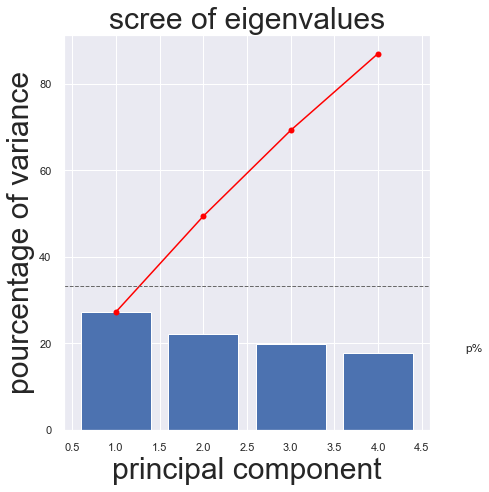

In [38]:
display_scree_plot(pca, 3)

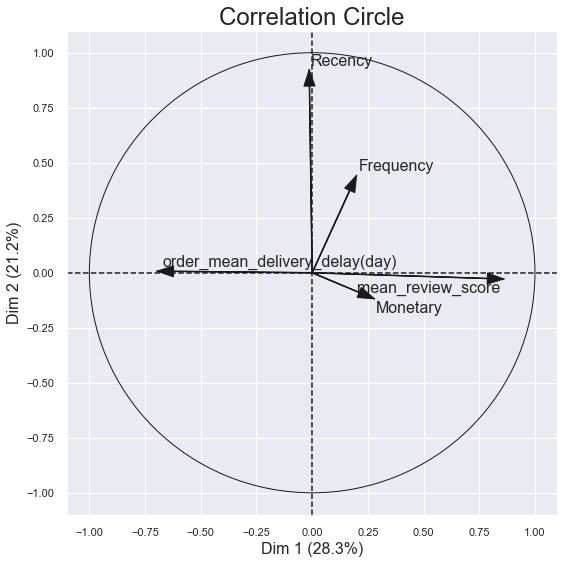

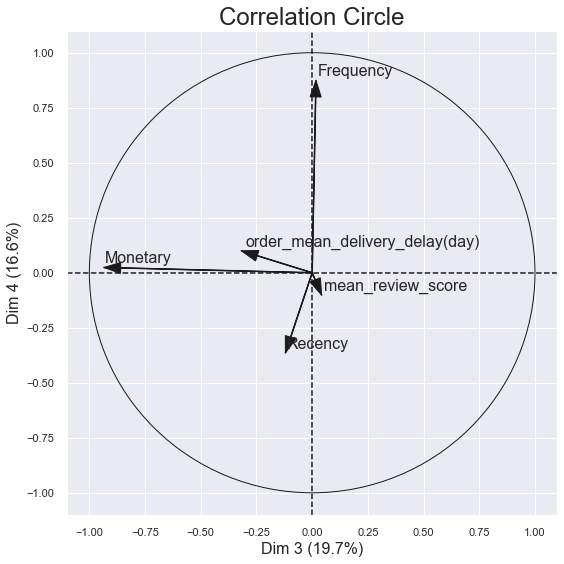

In [39]:
X_corr=X_kmeans_scale.sample(frac=0.1)
figure , correlation_matrix = plot_pca_correlation_graph (X_corr.values , X_corr.columns , dimensions=(1,2) , figure_axis_size=8)
figure , correlation_matrix = plot_pca_correlation_graph (X_corr.values , X_corr.columns , dimensions=(3,4) , figure_axis_size=8)

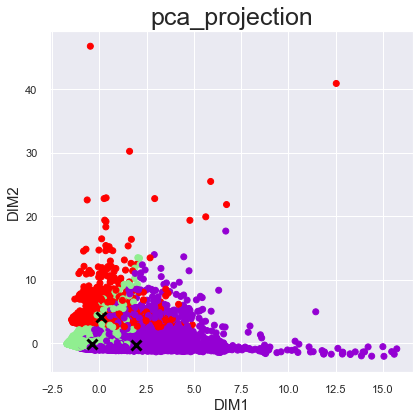

In [40]:
plot_2D_reduction (X_pca, 'cluster', 'DIM1', 'DIM2', 'pca')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=100, linewidths=3,  color='black', zorder=10)

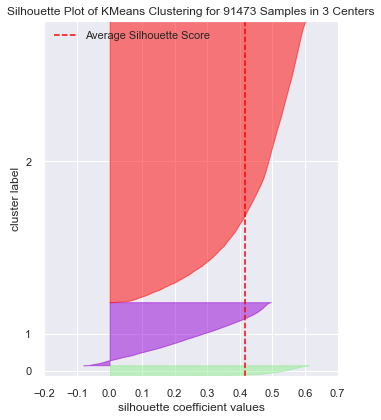

In [41]:
silhouette_visualizer(X_pca.drop(columns='cluster', axis=1), best_k )

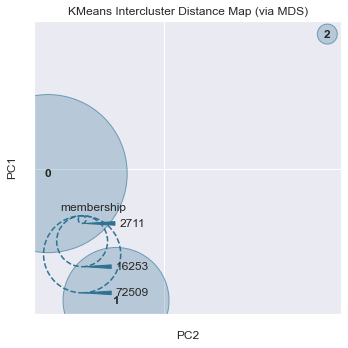

In [42]:
intercluster_distance(X_pca.drop(columns='cluster', axis=1), best_k)

#### b- t-SNE

In [43]:
df_tsne = X.sample(frac=.02)
df_tsne_scale=preprocessor.fit_transform(df_tsne)
df_tsne_scale = pd.DataFrame(data=df_tsne_scale, columns=df_tsne.columns)
df_tsne_scale

,Recency,Frequency,Monetary,order_mean_delivery_delay(day),mean_review_score
0,-0.172954,-0.493515,-0.658002,0.666086,-0.757241
1,-0.172954,-0.566611,-1.307365,0.666086,-0.639728
2,-0.172954,-0.348006,-0.791891,0.666086,-0.522214
3,-0.172954,-0.542262,-0.149222,-0.119439,1.005463
4,-0.172954,1.341254,1.618118,-0.119439,-0.874755
5,-0.172954,-0.156727,-0.751724,0.666086,0.535409
6,-0.172954,-0.591497,0.326085,0.666086,-0.169673
7,-0.172954,-0.493906,0.225668,-0.119439,0.182868
8,-0.172954,-0.661812,-0.483945,0.666086,-0.992269
9,-0.172954,-0.552021,-0.430390,-0.904965,1.945572


In [44]:
%%time
clusters = model.fit_predict(df_tsne_scale)
print("clusters creayed are : "+ str(list(set(clusters))))

clusters creayed are : [0, 1, 2]
Wall time: 61.5 ms


In [45]:
%%time
tsne = TSNE(n_components=2, random_state=0, perplexity=40, init='pca', n_iter=3000)
X_tsne = tsne.fit_transform(df_tsne_scale)

Wall time: 17.2 s


In [46]:
tsne.kl_divergence_

0.687674880027771

In [47]:
tsne.embedding_

array([[-39.297497 , -12.459834 ],
       [-45.073624 ,  14.646428 ],
       [-38.195816 ,  -7.9734592],
       ...,
       [-34.54226  , -20.62847  ],
       [-39.356934 ,   5.1466374],
       [ -9.80668  , -35.12978  ]], dtype=float32)

In [48]:
tsne_columns = ['DIM' + str(c) for c in range(1, X_tsne.shape[1]+1, 1)] 
X_tsne  = pd.DataFrame (data = X_tsne, columns= tsne_columns)
clusters = model.fit_predict(X_tsne)
X_tsne['cluster']=clusters
X_tsne

,DIM1,DIM2,cluster
0,-39.297497,-12.459834,1
1,-45.073624,14.646428,1
2,-38.195816,-7.973459,1
3,11.235467,7.759422,0
4,19.036417,-10.310352,2
5,-16.401249,3.425525,1
6,-16.784876,-14.939280,1
7,17.105352,5.380168,0
8,-36.492004,-19.926773,1
9,34.834454,8.333381,2


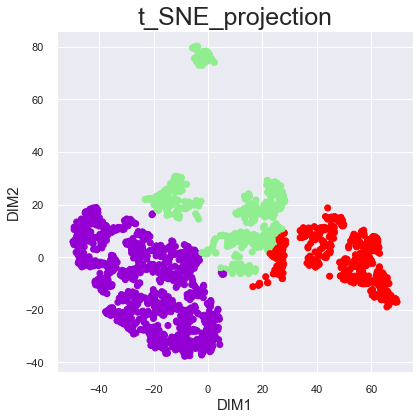

In [49]:
plot_2D_reduction (X_tsne, 'cluster', 'DIM1', 'DIM2', 't_SNE')

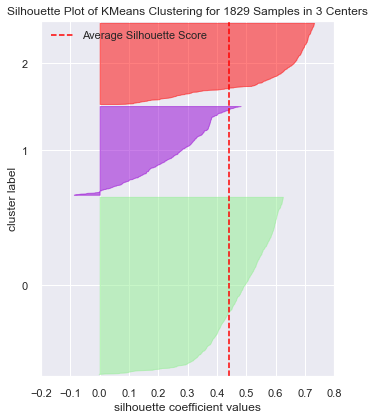

In [79]:
silhouette_visualizer(X_tsne.drop(columns='cluster', axis=1), best_k )

### 1-5- k-means stability

In [50]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = model.fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator.inertia_]
    
    # Test differents metrics on pred labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score]
    results += [m(labels, estimator.labels_) for m in clustering_metrics]
     # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [51]:
print("Scores de stabilité à l'initialisation")
print(53 * '_')
print('Iteration\tFitTime\tInertia\tHomo\tARI\tAMI')
print(53 * '_')

for i in range(10):
    model = KMeans(n_clusters=best_k, n_init=3, init="k-means++")
    sample = X_kmeans_scale.sample(frac=0.2)
    model.fit(sample)
    labels=model.labels_
    bench_k_means(model, "Iter "+str(i), sample, labels)

print(53 * '_')

Scores de stabilité à l'initialisation
_____________________________________________________
Iteration	FitTime	Inertia	Homo	ARI	AMI
_____________________________________________________
Iter 0   	0.059s	60006	0.992	0.996	0.991
Iter 1   	0.086s	65527	1.000	1.000	1.000
Iter 2   	0.047s	55532	0.364	0.343	0.463
Iter 3   	0.051s	57528	0.996	0.999	0.997
Iter 4   	0.032s	62054	0.992	0.997	0.991
Iter 5   	0.038s	59006	0.624	0.331	0.455
Iter 6   	0.032s	58179	0.999	1.000	0.999
Iter 7   	0.093s	53765	1.000	1.000	1.000
Iter 8   	0.038s	65021	0.633	0.336	0.461
Iter 9   	0.034s	65348	0.635	0.340	0.464
_____________________________________________________


In [52]:
print("Scores de stabilité à l'initialisation")
print(53 * '_')
print('Iteration\tFitTime\tInertia\tHomo\tARI\tAMI')
print(53 * '_')

for i in range(10):
    model = KMeans(n_clusters=best_k, n_init=3, init="random")# à corriger
    sample = X_kmeans_scale.sample(frac=0.2)
    model.fit(sample)
    labels=model.labels_
    bench_k_means(model, "Iter "+str(i), sample, labels)

print(53 * '_')

Scores de stabilité à l'initialisation
_____________________________________________________
Iteration	FitTime	Inertia	Homo	ARI	AMI
_____________________________________________________
Iter 0   	0.049s	63222	0.997	0.999	0.998
Iter 1   	0.050s	60794	0.358	0.336	0.454
Iter 2   	0.039s	60387	0.991	0.996	0.991
Iter 3   	0.037s	63812	0.997	0.999	0.997
Iter 4   	0.052s	57804	0.361	0.332	0.458
Iter 5   	0.055s	62237	0.999	1.000	0.999
Iter 6   	0.041s	55829	0.999	1.000	0.999
Iter 7   	0.020s	61325	0.995	0.998	0.995
Iter 8   	0.048s	58618	0.996	0.998	0.996
Iter 9   	0.035s	55165	0.999	1.000	0.999
_____________________________________________________


## 2- Clustering with DBSCAN

### 2-1- Hyperparameter tuning

In [53]:
X_DBSCAN = X.sample(frac=0.1) 
X_DBSCAN_scale=preprocessor.fit_transform(X_DBSCAN)
X_DBSCAN_scale = pd.DataFrame(data=X_DBSCAN_scale, columns=X.columns)

In [54]:
min_samples = X_DBSCAN.shape[1]*2
k = min_samples if min_samples > 2 else 2
neighbors = NearestNeighbors(n_neighbors=k).fit(X_DBSCAN_scale)
distances, indices = neighbors.kneighbors(X_DBSCAN_scale)

In [55]:
print("min samples: " + str(min_samples))
print("shape of distances matrix: " + str(distances.shape) + '\n')
for enum, row in enumerate(distances[:5]):
    print("observation: " + str(enum) + ":" + str([round(x, 2) for x in row]))

min samples: 10
shape of distances matrix: (9147, 10)

observation: 0:[0.0, 0.04, 0.07, 0.09, 0.1, 0.1, 0.11, 0.11, 0.12, 0.12]
observation: 1:[0.0, 0.09, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.18, 0.19]
observation: 2:[0.0, 0.11, 0.12, 0.13, 0.16, 0.2, 0.2, 0.2, 0.22, 0.22]
observation: 3:[0.0, 0.03, 0.09, 0.1, 0.11, 0.11, 0.12, 0.14, 0.14, 0.15]
observation: 4:[0.0, 0.1, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.14]


In [56]:
X_DBSCAN_scale['knn farthest distance'] = distances[:,-1]
X_DBSCAN_scale.head()

,Recency,Frequency,Monetary,order_mean_delivery_delay(day),mean_review_score,knn farthest distance
0,-0.173578,-0.556070,-0.482392,0.668923,-0.759498,0.118504
1,-0.173578,-0.258547,0.186126,-0.101939,0.045741,0.188795
2,-0.173578,0.279108,-0.469284,0.668923,-0.256224,0.222419
3,-0.173578,-0.579649,0.199234,-0.101939,0.146396,0.150422
4,-0.173578,-0.565502,-0.082592,0.668923,0.146396,0.136532


(0.0, 1.25)

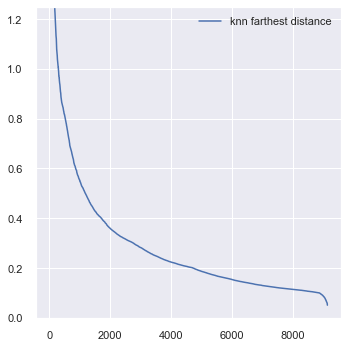

In [57]:
X_DBSCAN_scale.sort_values('knn farthest distance', ascending=False).reset_index()[['knn farthest distance']].plot()
plt.ylim([0,1.25])

<Figure size 360x360 with 0 Axes>

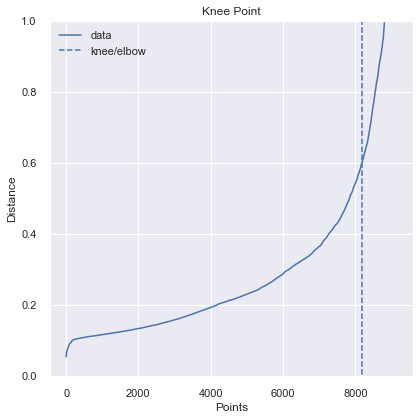

the best_eps is : 0.604


In [58]:
#best eps determination
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X_DBSCAN_scale)

distances, indices = neighbors.kneighbors(X_DBSCAN_scale)
distances = np.sort(distances[:,10], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.ylim([0,1])
plt.show()

best_eps = distances[knee.knee]
best_eps=round(best_eps, 3)
print('the best_eps is :',best_eps)

### 3-2- Clustering

In [59]:
%%time
model = DBSCAN(eps=best_eps, min_samples=200)
clusters = model.fit_predict(X_DBSCAN_scale)
print("clusters creayed are : "+ str(list(set(clusters))))

clusters creayed are : [0, 1, -1]
Wall time: 637 ms


In [60]:
X_DBSCAN['cluster']=clusters
X_DBSCAN['cluster'] = X_DBSCAN['cluster'].replace({-1:2})
X_DBSCAN

,Recency,Frequency,Monetary,order_mean_delivery_delay(day),mean_review_score,cluster
84074,164,1,21.90,5.0,5.0,0
2298,266,1,84.99,13.0,4.0,1
65592,166,1,199.00,10.0,5.0,0
48735,268,1,16.90,14.0,4.0,1
52369,225,1,19.90,14.0,5.0,0
...,...,...,...,...,...,...
10909,79,1,38.99,15.0,4.0,1
63120,371,1,150.00,7.0,5.0,0
71167,470,1,109.00,9.0,4.0,2
46670,428,1,174.33,16.0,5.0,0


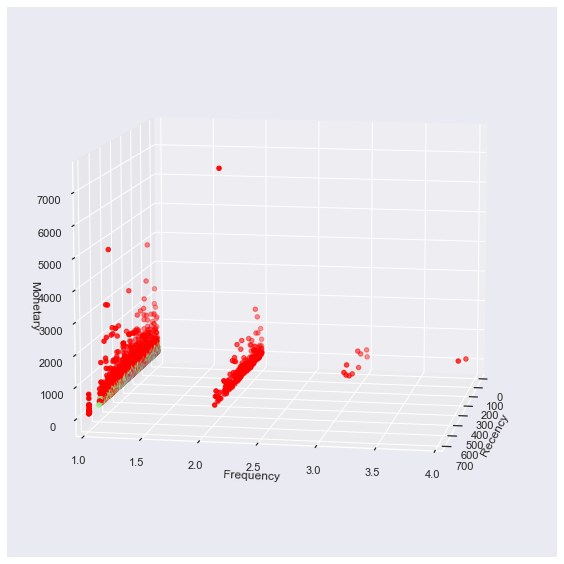

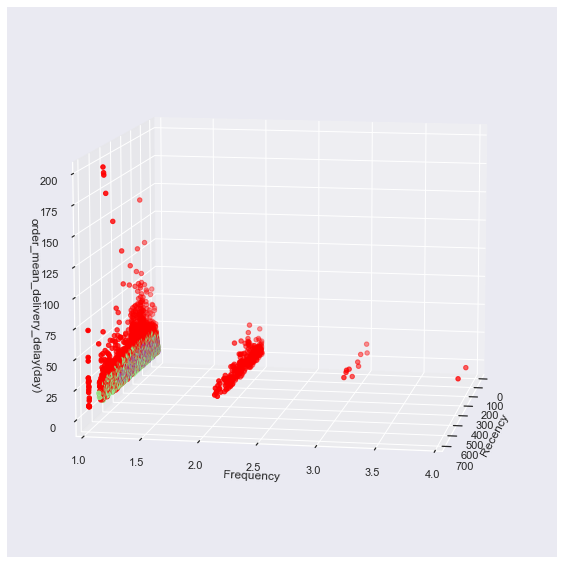

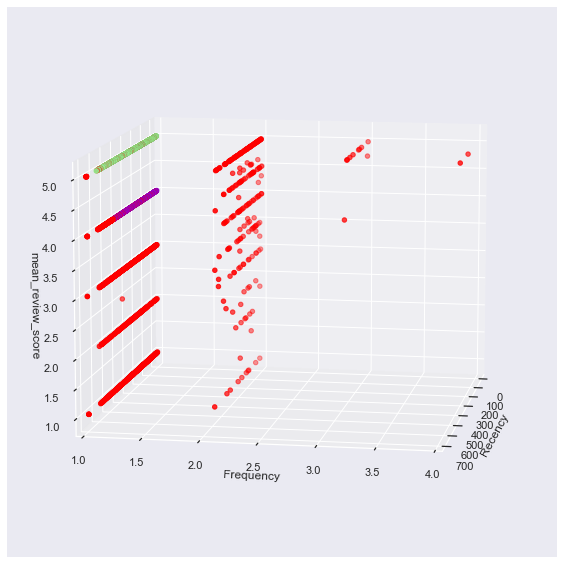

In [61]:
for col in col_for_3D : 
    plot_3D_clusters(X_DBSCAN, 'Recency','Frequency',col )


### 2-3- Clusters analyzing

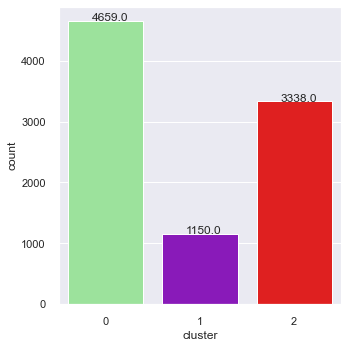

In [62]:
customers_per_cluster(X_DBSCAN)

In [63]:
X_DBSCAN.groupby('cluster').mean()

,Recency,Frequency,Monetary,order_mean_delivery_delay(day),mean_review_score
cluster,,,,,
0,231.772269,1.000000,94.473593,9.791801,5.000000
1,194.224348,1.000000,85.686078,9.949565,4.000000
2,260.682145,1.091672,221.748328,17.283481,2.966627


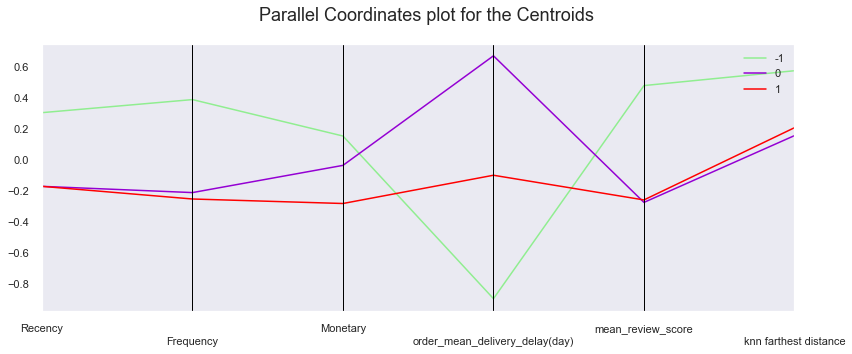

In [64]:
X_DBSCAN_scale['cluster']=clusters
centroids = X_DBSCAN_scale.groupby('cluster').mean()
centroids = centroids.reset_index()
display_parallel_coordinates_centroids(centroids, 2)

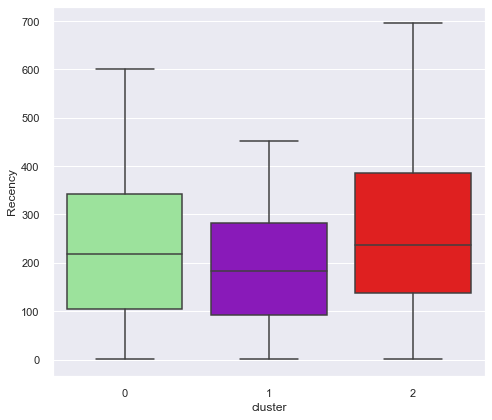

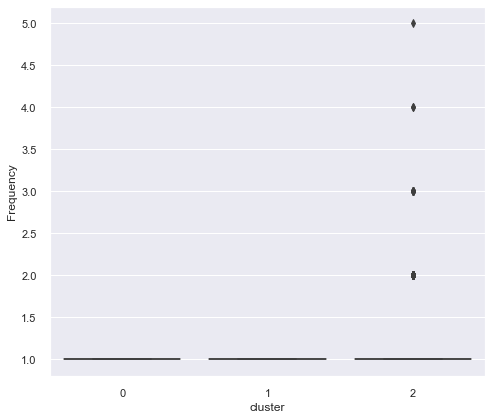

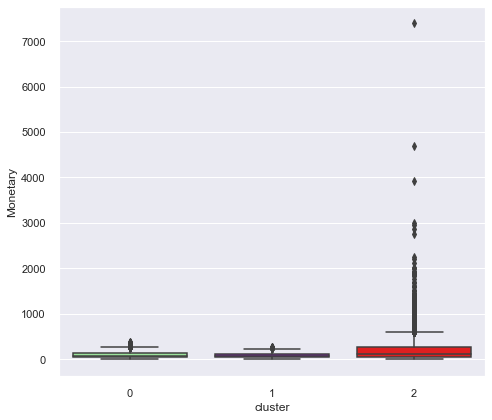

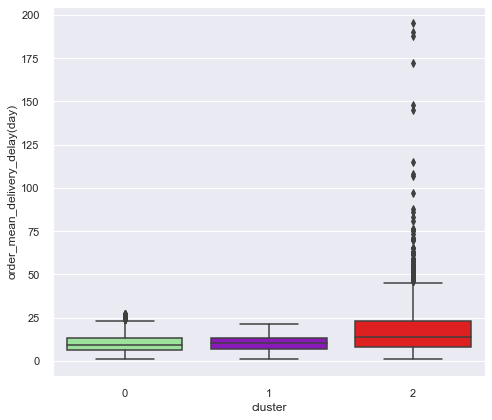

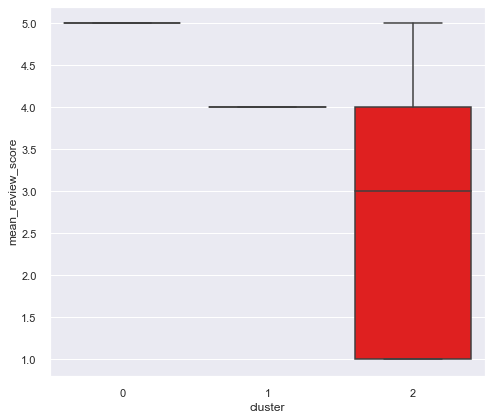

In [65]:
for col in X.columns : 
    boxplot(X_DBSCAN, col)

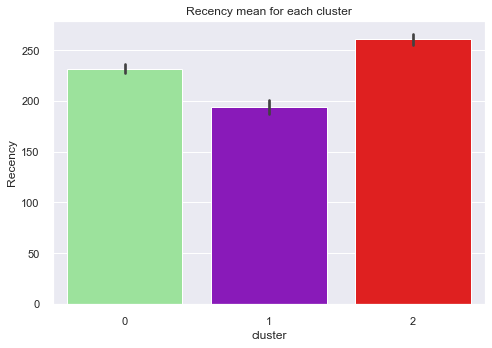

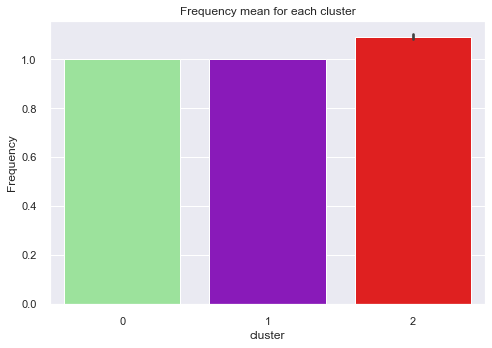

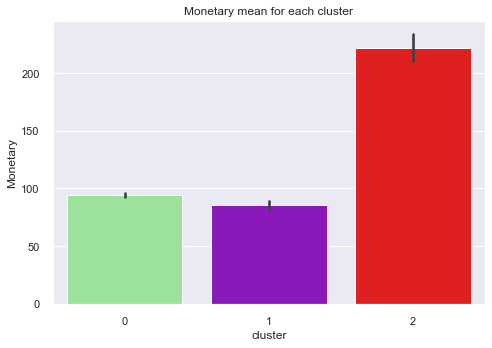

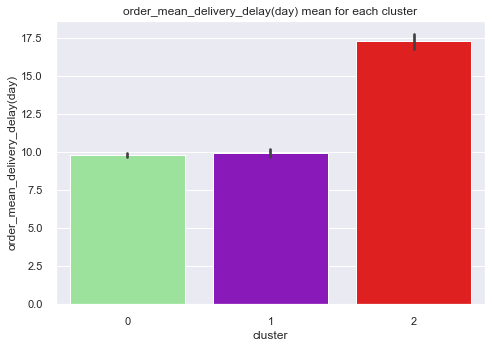

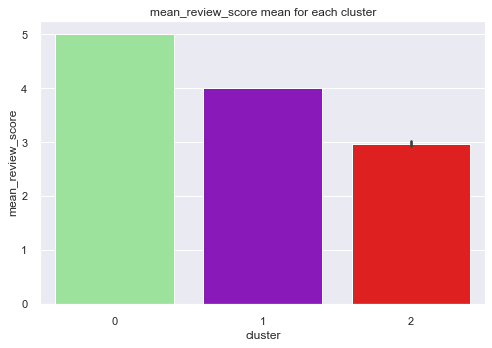

In [66]:
for column in X.columns:
    plt.figure(figsize=(7,5))
    titre = str(column) + ' mean' + ' for each cluster' 
    plt.title(titre)
    sns.barplot(x = 'cluster',
                y = column,
                data = X_DBSCAN, 
                palette=palette)
    plt.show()

## 4- Performing a Hierarchical clustering 


In [67]:
def plot_dendrogram(Z, names, figsize=(10,25)):
    '''Plot a dendrogram to illustrate hierarchical clustering'''

    plt.figure(figsize=figsize)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )

### 4-1- Clustering

In [68]:
X_hierarchical = X.sample(frac=0.1) 
X_hierarchical_scale=preprocessor.fit_transform(X_hierarchical)
X_hierarchical_scale = pd.DataFrame(data=X_hierarchical_scale, columns=X.columns)

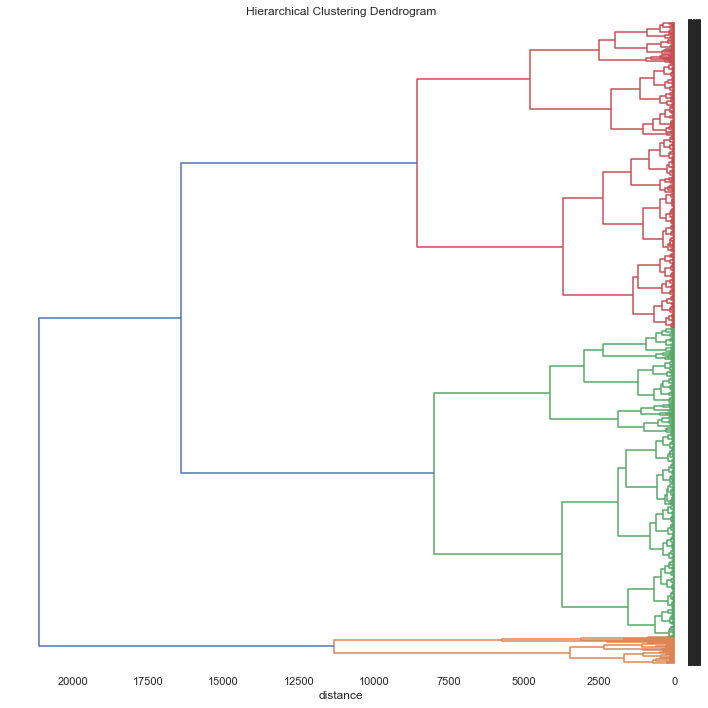

In [81]:
%%time
Z=linkage(X_hierarchical,'ward')
names=X_hierarchical.index
plot_dendrogram(Z, names, figsize=(10,10))

In [70]:
model= AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True)

In [71]:
model.set_params(n_clusters=3)
clusters=model.fit_predict(X_hierarchical_scale)
np.bincount(clusters)

array([7428, 1461,  258], dtype=int64)

In [72]:
X_hierarchical['cluster']=clusters
X_hierarchical

,Recency,Frequency,Monetary,order_mean_delivery_delay(day),mean_review_score,cluster
42082,400,1,89.90,21.0,4.0,0
40797,316,1,19.90,10.0,5.0,0
52345,105,1,45.00,8.0,5.0,0
1771,206,1,13.65,31.0,2.0,1
11775,419,1,22.99,15.0,5.0,0
...,...,...,...,...,...,...
9658,9,2,159.90,14.5,4.5,2
15739,505,1,316.90,9.0,4.0,0
35846,491,1,88.00,17.0,4.0,0
47515,198,1,168.98,29.0,5.0,0


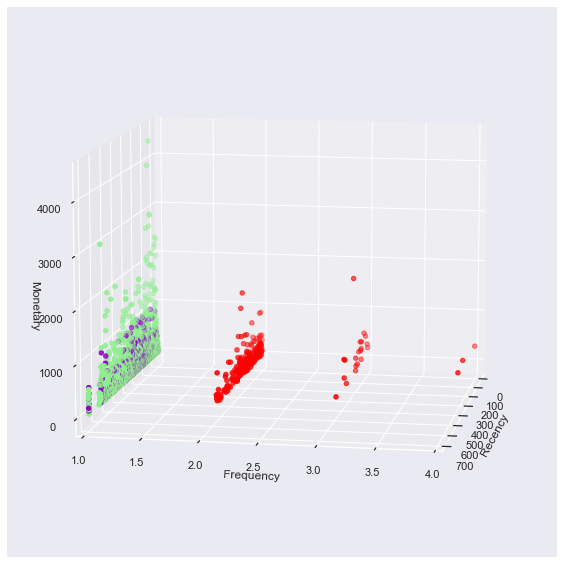

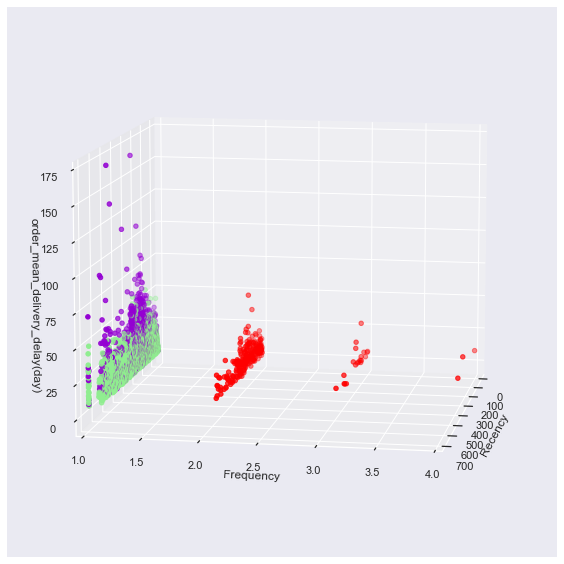

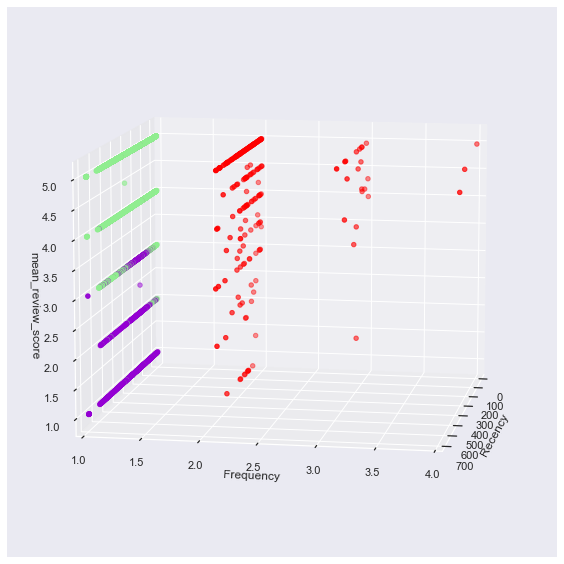

In [73]:
for col in col_for_3D : 
    plot_3D_clusters(X_hierarchical, 'Recency','Frequency',col )


### 4-2- Clusters analyzing

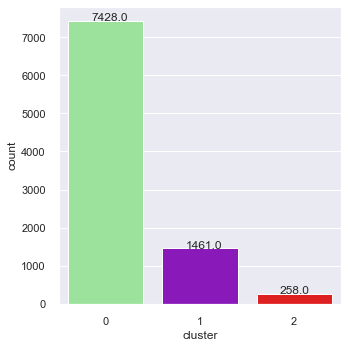

In [74]:
X_hierarchical_scale['cluster']=clusters
customers_per_cluster(X_hierarchical_scale)

In [75]:
X_hierarchical['cluster']=clusters
X_hierarchical.groupby('cluster').mean()

,Recency,Frequency,Monetary,order_mean_delivery_delay(day),mean_review_score
cluster,,,,,
0,238.611605,1.000000,138.420008,10.875606,4.648021
1,244.919918,1.000000,136.371143,19.947296,1.673169
2,198.589147,2.131783,249.145194,12.062558,4.277791


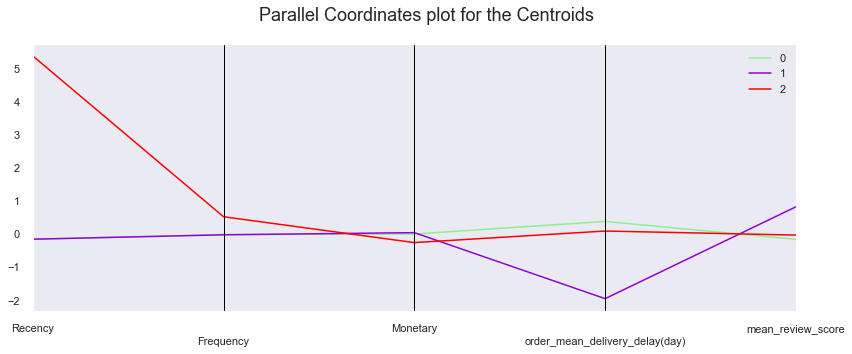

In [76]:
centroids = X_hierarchical_scale.groupby('cluster').mean()
centroids = centroids.reset_index()
centroids
display_parallel_coordinates_centroids(centroids, 3)

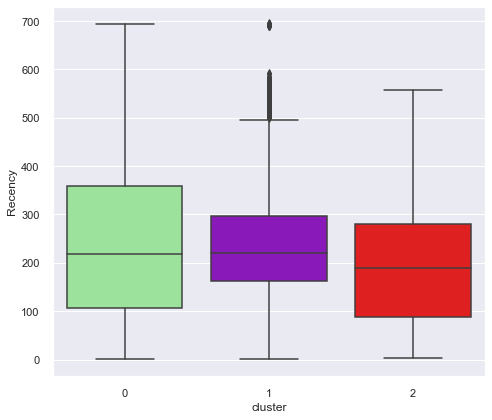

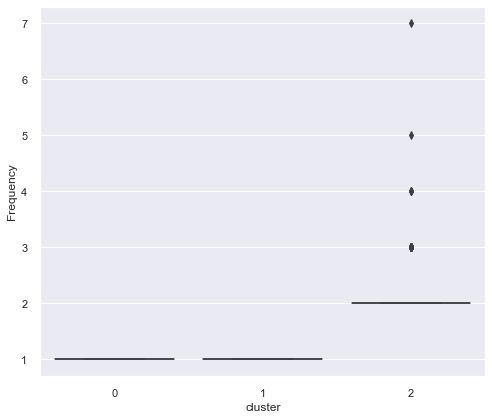

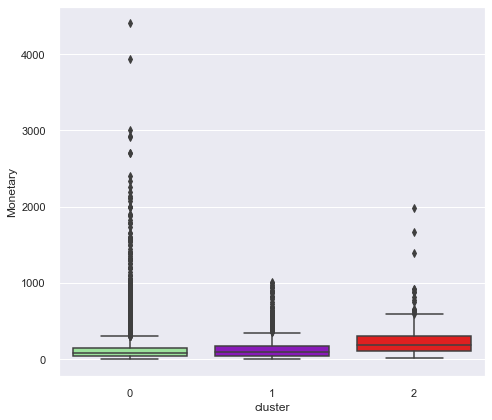

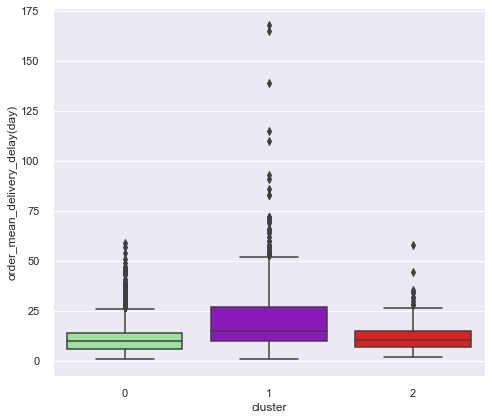

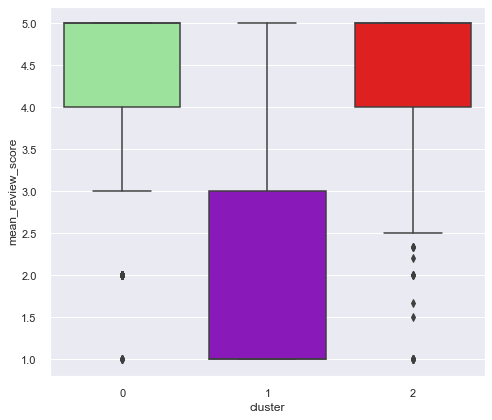

In [77]:
for col in X.columns : 
    boxplot(X_hierarchical, col)

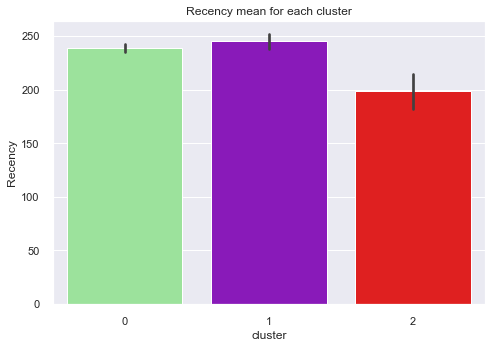

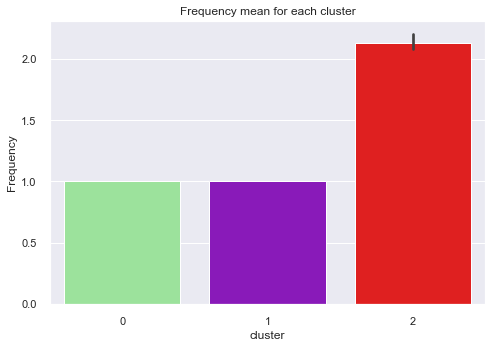

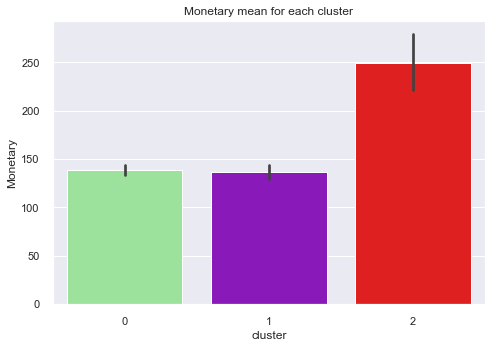

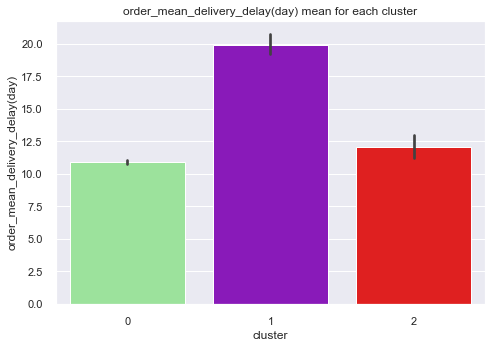

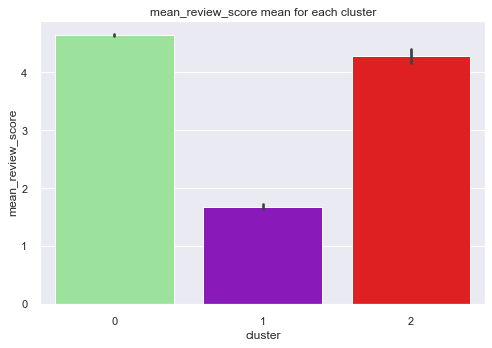

In [78]:
for column in X.columns:
    plt.figure(figsize=(7,5))
    titre = str(column) + ' mean' + ' for each cluster' 
    plt.title(titre)
    sns.barplot(x = 'cluster',
                y = column,
                data = X_hierarchical, 
                palette=palette)
    plt.show()